# Computer Vision - Laboratory

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [1]:
import numpy as np # useful for manipulating matrices
from skimage import * # useful for image loading and saving
from skimage import color
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [2]:
%matplotlib inline

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

In [3]:
import numpy as np

image=np.zeros((150,200),dtype=np.uint8)
print(image[0,1]) #check the pixel value
print(image.shape)
print(image.size)
print(image.dtype)

0
(150, 200)
30000
uint8


How many values can each pixel have in this case? 

In [4]:
#256 values

b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). 

Visualize the image and print the values of its first row.

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


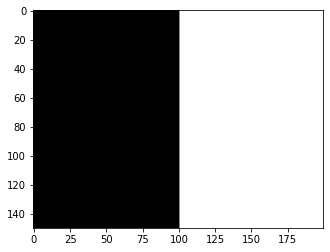

In [5]:
limit = int(image.shape[1]/2)

image[:,0:limit] = 0
image[:,limit+1:image.shape[1]] = 255
print(image)

plt.imshow(image, cmap='gray') #li has de dir que les dislpaieji en blanc i negre sinó et fara coses rares

### 1.2 Image saving and loading

a) Use the IO image package to save the image previously created:

In [6]:
from skimage import io

io.imsave('imatgenegreiblanc.jpeg', image)

/home/pau/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


b) Load the saved image and visualize it:

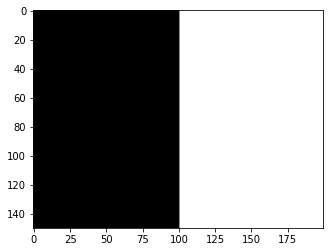

In [7]:
image2=io.imread('imatgenegreiblanc.jpeg')
plt.imshow(image2, cmap='gray')

### 1.3 Images manipulation and image masks

a) Load and show the image lenna.jpg, and check its dimensions. Add a black frame to Lenna's image. It should have a width of 1/10th of the height of the original image. We recommend to create a bigger black image to later embed the original image in the central part.

(225, 400, 3)
(247, 440, 3)
11 20


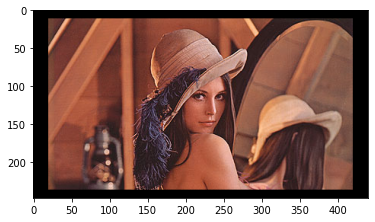

In [8]:
lenna = io.imread('images/lenna.jpg')
plt.imshow(lenna)
print(lenna.shape)

newshape = (int(lenna.shape[0]*1.1),int(lenna.shape[1]*1.1), int(lenna.shape[2]*1.1))

print(newshape)

lennaFrame=np.zeros(newshape,dtype=np.uint8)
plt.imshow(lennaFrame)

limit1 = int((newshape[0]-lenna.shape[0])/2)
limit2 = int((newshape[1]-lenna.shape[1])/2)

#limit 3 no fa pas falta, ja que només t'està dient quants canals té la matriu.
print(limit1,limit2)

lennaFrame[limit1:lenna.shape[0]+limit1, limit2:lenna.shape[1]+limit2] = lenna[:,:]
plt.imshow(lennaFrame)

b) Change the mask of the framed image to red. Visualize the three images with their respective titles.

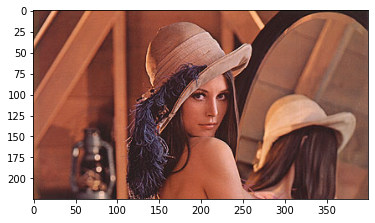

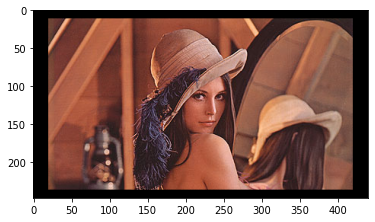

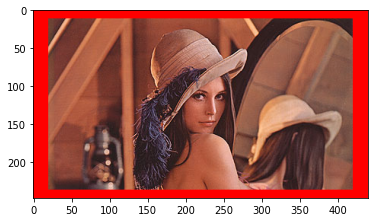

In [9]:
limit1 = int((newshape[0]-lenna.shape[0])/2)
limit2 = int((newshape[1]-lenna.shape[1])/2)

lennaRed = lennaFrame.copy()


mask = lennaRed[0:limit1, :] = [255,0,0]
mask = lennaRed[limit1+lenna.shape[0]:, :] = [255,0,0]
mask = lennaRed[:, limit2+lenna.shape[1]:] = [255,0,0]
mask = lennaRed[:, 0:limit2] = [255,0,0]


plt.imshow(lenna)
plt.show()

plt.imshow(lennaFrame)
plt.show()

plt.imshow(lennaRed)
plt.show()



### 1.4 Color manipulation

a) Create and visualize the three images shown in the following figure:
<img src="./images_notebook/ex17a.png">

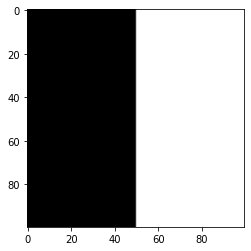

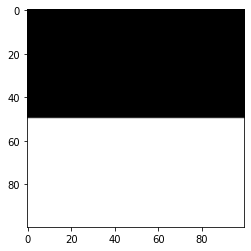

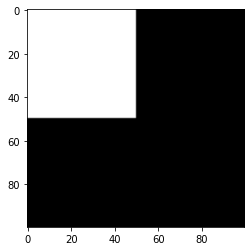

In [10]:
#Your solution
"""
imatge 1: [0,255,255]
imatge 2: [255,0,255]
imatge 3: [255,255,0]
"""
import numpy as np

image0 = np.zeros((100,100),dtype=np.uint8)
image1 = np.zeros((100,100),dtype=np.uint8)
image2 = np.zeros((100,100),dtype=np.uint8)


image0[:,50:100] = 255

image1[50:100,:] = 255

image2[0:50,0:50] = 255

plt.imshow(image0, cmap='gray')
plt.show()


plt.imshow(image1, cmap='gray')
plt.show()

plt.imshow(image2, cmap='gray')

b) Using these three images, construct the following color image:
<img src='./images_notebook/ex17b.png'>

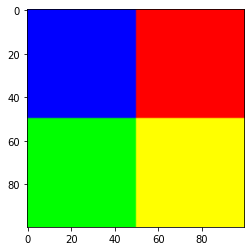

In [11]:
#Your solution
result = np.zeros((100,100,3),dtype=np.uint8)
result[:,:,0] = image0[:,:]
result[:,:,1] = image1[:,:]
result[:,:,2] = image2[:,:]

plt.imshow(result)

c) Read and visualize the image `sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/ex17c.png">

<img src="images_notebook/ex17c2.png">

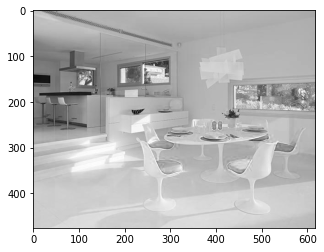

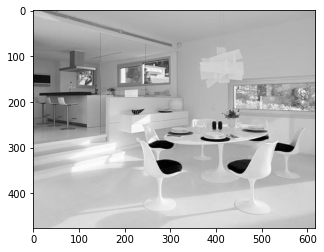

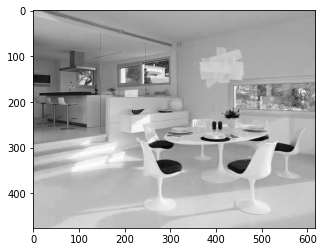

In [12]:
silla = io.imread('images/sillas.jpg')
plt.imshow(silla)

red = silla[:,:,0].copy()
plt.imshow(red, cmap='gray')
plt.show()

green = silla[:,:,1].copy()
plt.imshow(green, cmap='gray')
plt.show()

blue = silla[:,:,2].copy()
plt.imshow(blue, cmap='gray')
plt.show()

### 1.5 Color image conversion

a) Load and show the image `lenna.jpg`, and check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation.

(225, 400, 3)


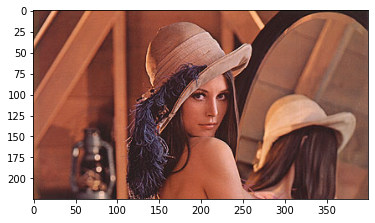

In [13]:
lenna = io.imread('images/lenna.jpg')
lenna.dtype = "uint8"
plt.imshow(lenna)
print(lenna.shape)

b) Convert the previous image to grayscale, visualize and save it. Moreover, show both images (RGB & greyscale) details such as shape, dtype, max and min values.

In [14]:
lennaBlack = color.rgb2gray(lenna)
lennaBlack = (lennaBlack*255).astype('uint8')
print(lennaBlack.shape)
print(lennaBlack.dtype)
print(lennaBlack.max())
print(lennaBlack.min())
io.imsave('lennaBlack.jpeg', lennaBlack)

(225, 400)
uint8
251
0


c) Convert the lena image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row.

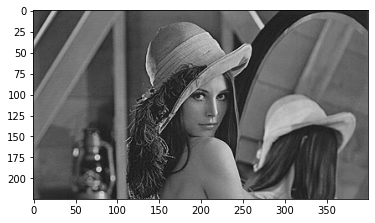

In [15]:
condicio = lennaBlack < 100

lennaBit = lennaBlack.copy()

lennaBit[condicio] = 0
lennaBit[~condicio] = 255

plt.imshow(lennaBlack, cmap='gray')

d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Set the corresponding titles of the images.

Text(0.5, 1.0, 'Lenna Bit')

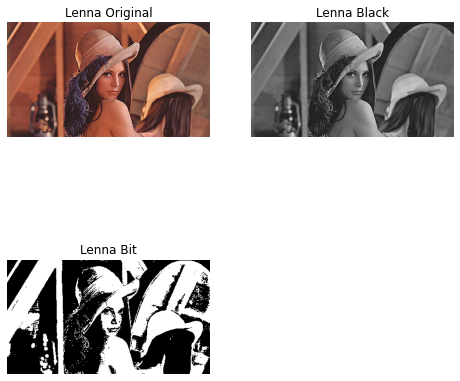

In [16]:
fig = plt.figure(figsize=(8,8))

fig.add_subplot(2,2,1)
plt.imshow(lenna)
plt.axis('off')
plt.title('Lenna Original')

fig.add_subplot(2,2,2)
plt.imshow(lennaBlack, cmap='gray')
plt.axis('off')
plt.title('Lenna Black')

fig.add_subplot(2,2,3)
plt.imshow(lennaBit, cmap='gray')
plt.axis('off')
plt.title('Lenna Bit')


### 1.6 Contrast enhancement

a) Open the image `car_lowContrast.jpg` and visualize it without graylevel enhancement. To this purpose, check which are the minimal and maximal values and how to use the command imshow without contrast enhancement.

Note: When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default.

(225, 400, 3)


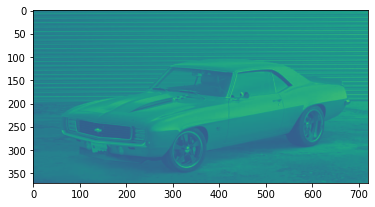

In [17]:
car = io.imread('images/car_lowContrast.jpg')

plt.imshow(car, vmin=0, vmax=255)
print(lenna.shape)

b) Create an image called `dark_image` using the  values from the original one, so that the minimal value of the new image is 0. Check the minimal and maximal values of the new image, and compare them with the previous one.

In [18]:
dark_image = car.copy()

dark_image = dark_image - car.min()

c) Create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and compare them with the previous one.

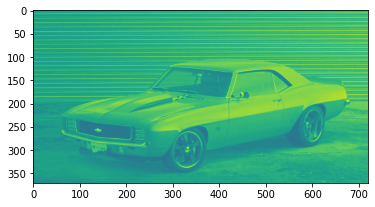

In [34]:
bright_im = car.copy().astype(float)/255.
bright_im = (bright_im*255)/car.astype(float).max()
bright_im = (bright_im*255).astype('uint8')

plt.imshow(bright_im, vmin=0, vmax=255)

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command. Check the minimal and maximal values of the enhanced image, and compare them with the previous one. 

Implement the contrast enhancement using the two different available methods.

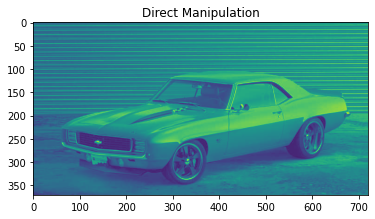

Text(0.5, 1.0, 'Normal imshow')

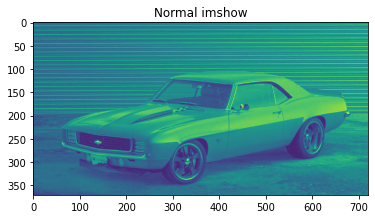

In [39]:
result = car.copy().astype(float)/255.
floatCar = car.copy().astype(float)/255.
result = (result - floatCar.min())/(floatCar.max() - floatCar.min())
result = (result*255).astype('uint8')

plt.imshow(result, vmin=0, vmax=255)
plt.title('Direct Manipulation')
plt.show()

plt.imshow(car)
plt.title('Normal imshow')

e) Visualize the 5 images in the same figure, each one with its corresponding title.

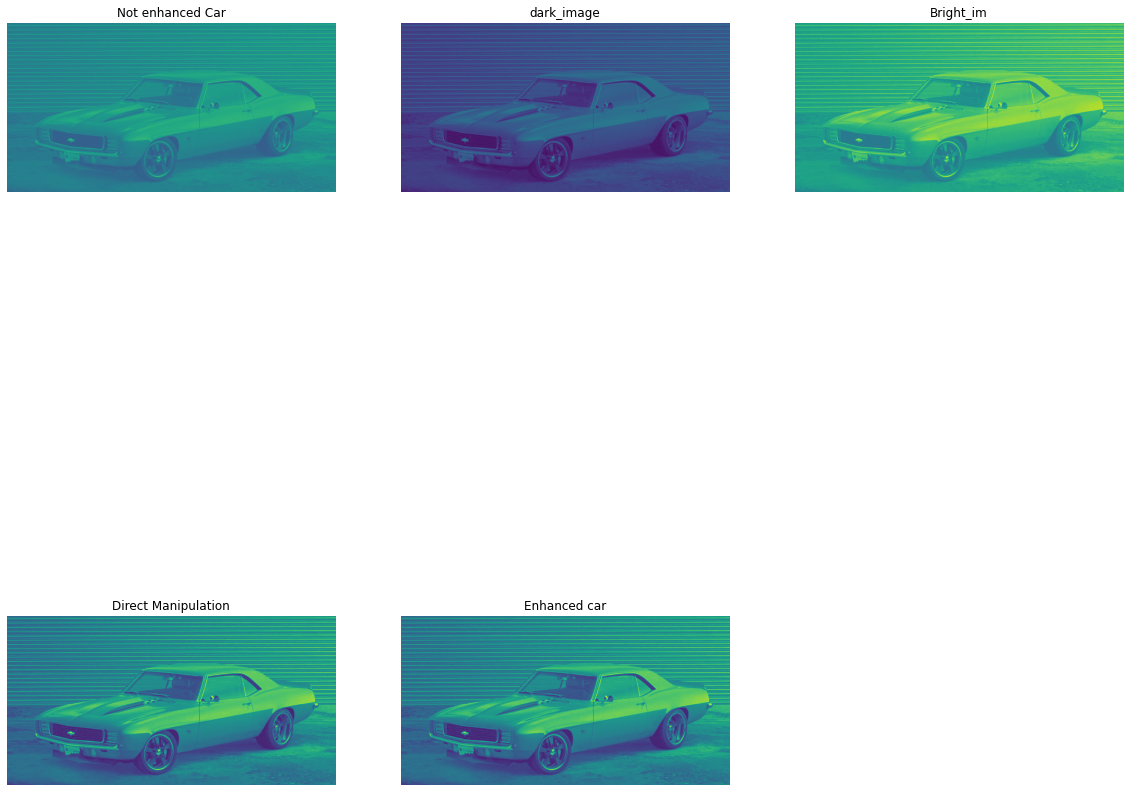

In [46]:
fig = plt.figure(figsize=(20,20))

fig.add_subplot(2,3,1)
plt.imshow(car, vmax=255, vmin=0)
plt.axis('off')
plt.title('Not enhanced Car')

fig.add_subplot(2,3,2)
plt.imshow(dark_image, vmax=255, vmin=0)
plt.axis('off')
plt.title('dark_image')

fig.add_subplot(2,3,3)
plt.imshow(bright_im, vmax=255, vmin=0)
plt.axis('off')
plt.title('Bright_im')

fig.add_subplot(2,3,4)
plt.imshow(result, vmax=255, vmin=0)
plt.axis('off')
plt.title('Direct Manipulation')

fig.add_subplot(2,3,5)
plt.axis('off')
plt.title('Enhanced car')
plt.imshow(result)


### 1.7 Masks and logical image manipulation

a) Read the image `circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

In [150]:
#Your solution

b) Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.

In [151]:
#Your solution

## Delivery

Compressed file **P1_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P1.zip.

**Deadline (Campus Virtual): September 28, 11:00 p.m.** 